
# Cyber Crime Data Analysis (Simplified)

This notebook analyses the cyber crime losses and complaints dataset using Python and pandas.  
The goal is to produce simple, easy‑to‑understand tables and charts showing the top five countries by losses and complaints for each year (2019–2024), along with basic trend and correlation analyses.  
All code is heavily commented so that non‑technical users can follow along.


## Load and coerce

In [1]:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Load the datasets. These must not be modified directly.
df_threats = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df_indices = pd.read_csv('Cyber_security.csv')
df_loss = pd.read_csv('LossFromNetCrime.csv')

# Replace missing country names with a placeholder to avoid issues when sorting.
df_loss['Country'] = df_loss['Country'].fillna('Unknown')

# Convert all numeric columns to numbers (they may already be numbers, but this ensures consistency).
numeric_cols = [c for c in df_loss.columns if c != 'Country']
df_loss[numeric_cols] = df_loss[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Define the years we'll be working with.
years = [2019, 2020, 2021, 2022, 2023, 2024]

## Computing total lossess worldwide

In [13]:
def extract_year(col):
    try:
        return int(str(col).split("_")[0])
    except Exception:
        return None

loss_columns = sorted([c for c in df_loss.columns if str(c).lower().endswith("_losses")], key=extract_year)
comp_columns = sorted([c for c in df_loss.columns if str(c).lower().endswith("_complaints")], key=extract_year)

loss_totals = pd.DataFrame({
    "year": [extract_year(c) for c in loss_columns],
    "total_losses": [pd.to_numeric(df_loss[c], errors="coerce").sum() for c in loss_columns]
}).dropna(subset=["year"]).astype({"year": int})

comp_totals = pd.DataFrame({
    "year": [extract_year(c) for c in comp_columns],
    "total_complaints": [pd.to_numeric(df_loss[c], errors="coerce").sum() for c in comp_columns]
}).dropna(subset=["year"]).astype({"year": int})

totals = pd.merge(loss_totals, comp_totals, on="year", how="outer").sort_values("year") 

totals.to_csv('Code_Output/totals.csv', index=False)

totals

TypeError: '<' not supported between instances of 'NoneType' and 'int'

## Separate DataFrame for TOP5 Countries for Complaints(No. of Attacks)

In [3]:

# Create an empty DataFrame to hold the top five countries for complaints.
top5_complaints = pd.DataFrame()

# For each year, sort the data by the complaints column in descending order,
# pick the top five countries, and store their names in a new column.
for year in years:
    col_name = f'{year}_Complaints'
    # Sort by complaints and take the top five country names.
    top_countries = df_loss.sort_values(by=col_name, ascending=False)['Country'].head(5).values
    # Assign this list to the corresponding year column in the top5_complaints DataFrame.
    top5_complaints[str(year)] = top_countries

# Display the resulting top 5 complaints table.
top5_complaints


,2019,2020,2021,2022,2023,2024
0,CN,US,CN,US,US,US
1,US,CN,US,CN,CN,CN
2,GB,GB,GB,GB,GB,GB
3,FR,RU,RU,RU,FR,RU
4,RU,HK,HK,HK,RU,BR


## Separate DataFrame for TOP5 Countries for Losses(in USD)

In [4]:

# Create an empty DataFrame to hold the top five countries for losses.
top5_losses = pd.DataFrame()

# For each year, sort the data by the losses column in descending order,
# pick the top five countries, and store their names in a new column.
for year in years:
    col_name = f'{year}_Losses'
    # Sort by losses and take the top five country names.
    top_countries = df_loss.sort_values(by=col_name, ascending=False)['Country'].head(5).values
    # Assign this list to the corresponding year column in the top5_losses DataFrame.
    top5_losses[str(year)] = top_countries

# Display the resulting top 5 losses table.
top5_losses


,2019,2020,2021,2022,2023,2024
0,US,US,US,US,US,US
1,CN,CN,RU,RU,RU,CN
2,RU,DE,CN,CN,CN,RU
3,DE,RU,GB,GB,DE,GB
4,GB,GB,UA,SG,UA,DE


## Creating tables for each year 2019 to 2024 + save to .CSV

In [5]:
# Build Top 5 tables for each year (complaints and losses)
top5_complaints = pd.DataFrame()
top5_losses     = pd.DataFrame()

for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    complaints_col = f'{year}_Complaints'
    losses_col     = f'{year}_Losses'

    top5_complaints[str(year)] = df_loss.sort_values(by=complaints_col, ascending=False)['Country'].head(5).values
    top5_losses[str(year)]     = df_loss.sort_values(by=losses_col,     ascending=False)['Country'].head(5).values

# Now save both tables – they are guaranteed to exist
top5_complaints.to_csv('Code_Output/top5_complaints_by_year.csv', index=False)
top5_losses.to_csv('Code_Output/top5_losses_by_year.csv', index=False)
print('Saved top5_complaints_by_year.csv and top5_losses_by_year.csv')


Saved top5_complaints_by_year.csv and top5_losses_by_year.csv


## Plot a bar chart - year-by-year (based on the top 5 number of complaints each year)

In [ ]:

# Plot a bar chart for each year showing the top five countries by complaints.
# Complaints are shown in millions to keep the numbers readable.

for year in years:
    col_name = f'{year}_Complaints'
    # Select the top five countries for this year.
    top5 = df_loss.sort_values(by=col_name, ascending=False).head(5)
    countries = top5['Country']
    values = top5[col_name] / 1_000_000  # convert to millions
    
    # Create the bar chart.
    plt.figure(figsize=(6, 4))
    plt.bar(countries, values)
    plt.title(f'Top 5 Countries by Complaints in {year}')
    plt.xlabel('Country')
    plt.ylabel('Complaints (millions)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Table - total complaints and lossess across all countries year-by-year

In [7]:

# Calculate total complaints and losses across all countries for each year.
totals = []
for year in years:
    total_complaints = df_loss[f'{year}_Complaints'].sum()
    total_losses = df_loss[f'{year}_Losses'].sum()
    totals.append({'Year': year, 'Total_Complaints': total_complaints,
                   'Total_Losses': total_losses})

totals_df = pd.DataFrame(totals)

# Compute the change from the previous year (NaN for the first year).
totals_df['Complaints_Change'] = totals_df['Total_Complaints'].diff()
totals_df['Losses_Change'] = totals_df['Total_Losses'].diff()

# Display the totals and changes.
totals_df


,Year,Total_Complaints,Total_Losses,Complaints_Change,Losses_Change
0,2019,2884094,27686530359,NaN,NaN
1,2020,5060074,32898320639,2175980.0,5.211790e+09
2,2021,5350493,55139794808,290419.0,2.224147e+10
3,2022,5029126,84187894180,-321367.0,2.904810e+10
4,2023,5324045,100502375119,294919.0,1.631448e+10
5,2024,5935856,118626086516,611811.0,1.812371e+10


## Correlation between complaints and lossses for each year

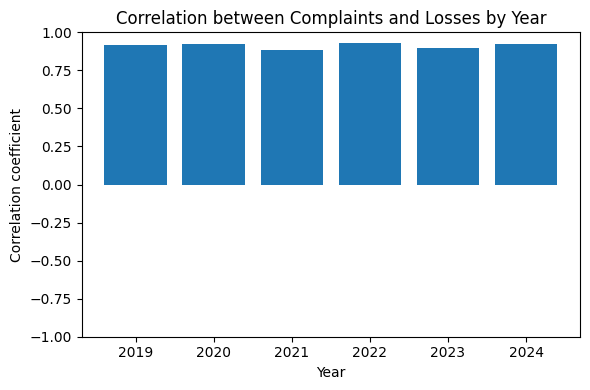

In [8]:

# Compute the Pearson correlation between complaints and losses for each year.
correlations = {}
for year in years:
    complaints_col = f'{year}_Complaints'
    losses_col = f'{year}_Losses'
    corr_value = df_loss[complaints_col].corr(df_loss[losses_col])
    correlations[year] = corr_value

# Convert to a DataFrame for display
corr_df = pd.DataFrame(list(correlations.items()), columns=['Year', 'Correlation'])

# Display correlation values
corr_df

# Plot the correlation values
plt.figure(figsize=(6, 4))
plt.bar(corr_df['Year'].astype(str), corr_df['Correlation'])
plt.title('Correlation between Complaints and Losses by Year')
plt.xlabel('Year')
plt.ylabel('Correlation coefficient')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


## Simple prediction (we check for AVG yearly change 2019-2024 and add it to 2024's value)

In [9]:

# We create a simple prediction for 2025 for the countries that frequently appear in the top five.
# The idea is to take the average yearly change in losses for each country and add it to 2024’s value.

# First, identify the union of all top countries from the top5 tables.
top_countries = set()
for year in years:
    # add top countries by complaints
    top_countries.update(df_loss.sort_values(by=f'{year}_Complaints', ascending=False)['Country'].head(5).tolist())
    # add top countries by losses
    top_countries.update(df_loss.sort_values(by=f'{year}_Losses', ascending=False)['Country'].head(5).tolist())

top_countries = sorted(top_countries)

# Prepare predictions
predictions = []
for country in top_countries:
    # Gather the past losses for this country
    losses = []
    for year in years:
        losses.append(df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0])
    
    # Compute the year‑to‑year differences
    diffs = pd.Series(losses).diff().dropna()
    # If there is no variance (e.g., constant), set avg_diff to zero
    avg_diff = diffs.mean() if not diffs.empty else 0
    
    # Predicted 2025 losses = 2024 losses + average yearly difference
    predicted_loss_2025 = losses[-1] + avg_diff
    
    predictions.append({'Country': country, 'Losses_2024': losses[-1],
                         'Predicted_Losses_2025': predicted_loss_2025})

pred_df = pd.DataFrame(predictions)

# Display the predictions
pred_df.sort_values(by='Predicted_Losses_2025', ascending=False)

,Country,Losses_2024,Predicted_Losses_2025
9,US,14457011740,1.668787e+10
1,CN,11299124337,1.305255e+10
6,RU,11161782401,1.291315e+10
4,GB,6379113995,7.386454e+09
2,DE,5279486289,6.023500e+09
8,UA,5161336915,5.935474e+09
7,SG,4524535787,5.219159e+09
3,FR,4025659986,4.637240e+09
5,HK,2863308167,3.286647e+09
0,BR,2590565434,2.994372e+09


Saving the difference in new columns in TOTALS DataFrame 

In [10]:
# Compute the year‑to‑year changes for each measure
totals_df['Losses_Change'] = totals_df['Total_Losses'].diff()
totals_df['Complaints_Change'] = totals_df['Total_Complaints'].diff()

# (Optional) Save to CSV so Power BI can pick it up easily
totals_df.to_csv('Code_Output/totals_df_with_changes.csv', index=False)

# View the updated DataFrame
totals_df


,Year,Total_Complaints,Total_Losses,Complaints_Change,Losses_Change
0,2019,2884094,27686530359,NaN,NaN
1,2020,5060074,32898320639,2175980.0,5.211790e+09
2,2021,5350493,55139794808,290419.0,2.224147e+10
3,2022,5029126,84187894180,-321367.0,2.904810e+10
4,2023,5324045,100502375119,294919.0,1.631448e+10
5,2024,5935856,118626086516,611811.0,1.812371e+10


## Plot line chart + prediction for 2025

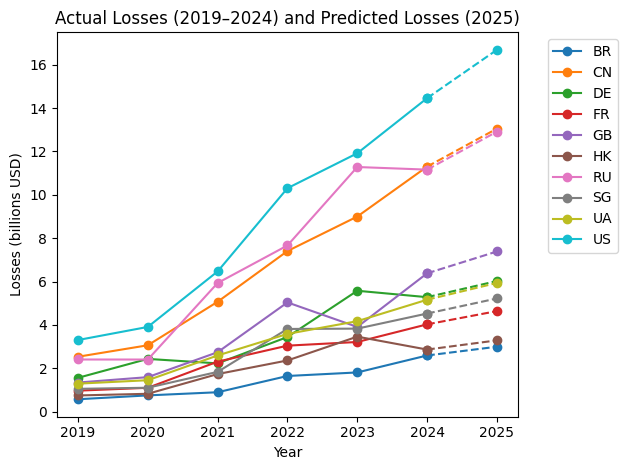

In [11]:
# Plot a line chart showing actual losses (2019–2024) and a dotted segment to 2025
# for each country in pred_df.  Assumes `years` = [2019, …, 2024].

for country in pred_df['Country']:
    # Collect actual losses for 2019–2024
    actual_losses = [df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0] for year in years]
    # Convert to billions
    actual_losses_b = [val / 1_000_000_000 for val in actual_losses]

    # Get predicted 2025 value (also convert to billions)
    predicted_2025_b = pred_df.loc[pred_df['Country'] == country, 'Predicted_Losses_2025'].values[0] / 1_000_000_000

    # Plot the solid line for actual data
    line, = plt.plot(years, actual_losses_b, marker='o', label=country)

    # Plot the dotted line segment from 2024 to the predicted 2025 point, using the same color
    plt.plot([years[-1], 2025], [actual_losses_b[-1], predicted_2025_b],
             linestyle='--', marker='o', color=line.get_color(), label='_nolegend_')

plt.title('Actual Losses (2019–2024) and Predicted Losses (2025)')
plt.xlabel('Year')
plt.ylabel('Losses (billions USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Prediction narrowed down to TOP countries

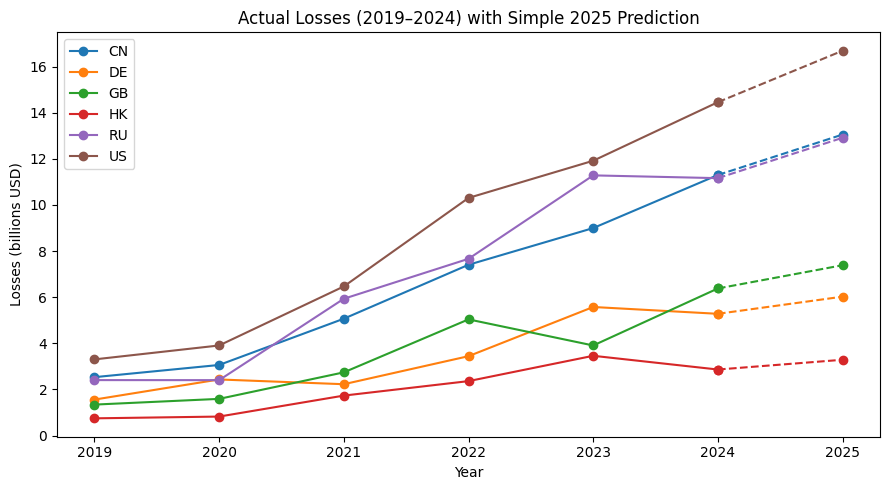

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Determine top countries by total losses and total complaints
years = [2019, 2020, 2021, 2022, 2023, 2024]

# Compute total losses and complaints across all years for each country
df_loss['Total_Losses']     = df_loss[[f'{y}_Losses'     for y in years]].sum(axis=1)
df_loss['Total_Complaints'] = df_loss[[f'{y}_Complaints' for y in years]].sum(axis=1)

# Extract top-5 lists based on these totals
top5_by_losses     = df_loss.nlargest(5, 'Total_Losses')['Country'].tolist()
top5_by_complaints = df_loss.nlargest(5, 'Total_Complaints')['Country'].tolist()

# Combine the two lists (remove duplicates)
selected_countries = sorted(set(top5_by_losses + top5_by_complaints))

# 2) Prepare predictions using a simple average-change method
predictions = []
for country in selected_countries:
    # Gather the six years of losses for this country
    losses = [df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0] for year in years]
    
    # Compute year-to-year differences and their average
    diffs = np.diff(losses)  # array of [Loss2020 - Loss2019, Loss2021 - Loss2020, ...]
    avg_diff = diffs.mean() if len(diffs) > 0 else 0
    
    # Predict 2025 losses by adding the average difference to the 2024 value
    predicted_2025 = losses[-1] + avg_diff
    
    predictions.append({
        'Country': country,
        'Losses_2024': losses[-1],
        'Predicted_Losses_2025': predicted_2025
    })

pred_df = pd.DataFrame(predictions)

# 3) Plot actual vs. predicted losses for each selected country
plt.figure(figsize=(9,5))
for country in selected_countries:
    # Actual 2019–2024 losses (converted to billions)
    actual_losses = [df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0] for year in years]
    actual_losses_b = [val / 1e9 for val in actual_losses]
    
    # Plot solid line for actual data
    line, = plt.plot(years, actual_losses_b, marker='o', label=f'{country}')
    
    # Plot dotted segment to predicted 2025 (same colour)
    pred_2025_b = pred_df.loc[pred_df['Country'] == country, 'Predicted_Losses_2025'].values[0] / 1e9
    plt.plot([years[-1], 2025], [actual_losses_b[-1], pred_2025_b],
             marker='o', linestyle='--', color=line.get_color(), label='_nolegend_')

plt.title('Actual Losses (2019–2024) with Simple 2025 Prediction')
plt.xlabel('Year')
plt.ylabel('Losses (billions USD)')
plt.legend()
plt.tight_layout()
plt.show()